# Imports and Inspection 

In [25]:
# Importing libs and data file
library(rio)
library(ggplot2)
library(dplyr)
library(pander)

data <- import("data.csv")

Warning message:
“package ‘pander’ was built under R version 4.0.3”

# Approach 

**RQ1:** 
- Compare the means of the scores for each type of Transfer Learning method and Typical Learning method (total 3 Typical X 6 Transfer = 18 comparisons, each leading to p-values and 95% CI of difference in scores) Maybe too leangthy and unnecessary :/
- Compare the means of the aggregated scores for Transfer Lerning method and Typical Learning method (2 p-vals and 95% CI interval for diff. in scores)
<br><br>

**RQ2:**
- Compare the means of the scores for each TrD_i when used and not used (TrD_i(1) vs TrD_i(0)). Thus total 8 TrD_i's X 2 versions (1/0) = 16 comparisons, p-values and 95% CI interval for diff. in scores.

# RQ1 

## Summary Stats 

In [19]:
# Inspecting some summary statistics

# counts of models
data %>% count(model)

# mean scores of models
data %>%
  group_by(model) %>%
  summarize(mean(score))

model,n
B1,7
B2,7
B3,7
M1,546
M2,539
M3,504
MF,490
MN,560
S,336


model,mean(score)
B1,0.4528788
B2,0.3278496
B3,0.3534039
M1,0.5088922
M2,0.5146289
M3,0.5204925
MF,0.5310110
MN,0.4546982
S,0.4287001


### Together 

### Models

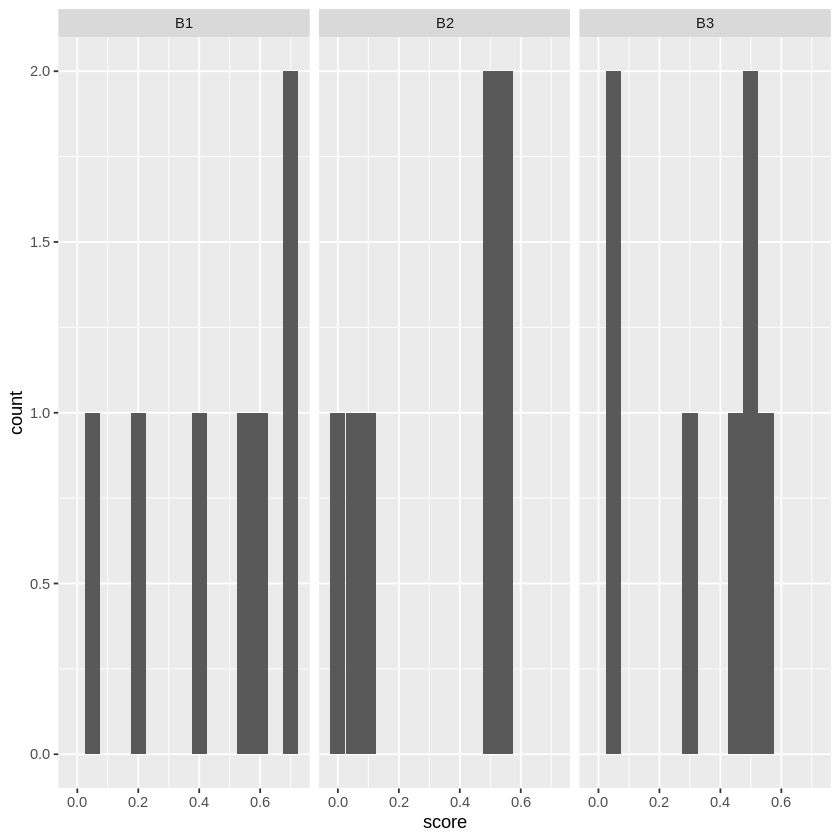

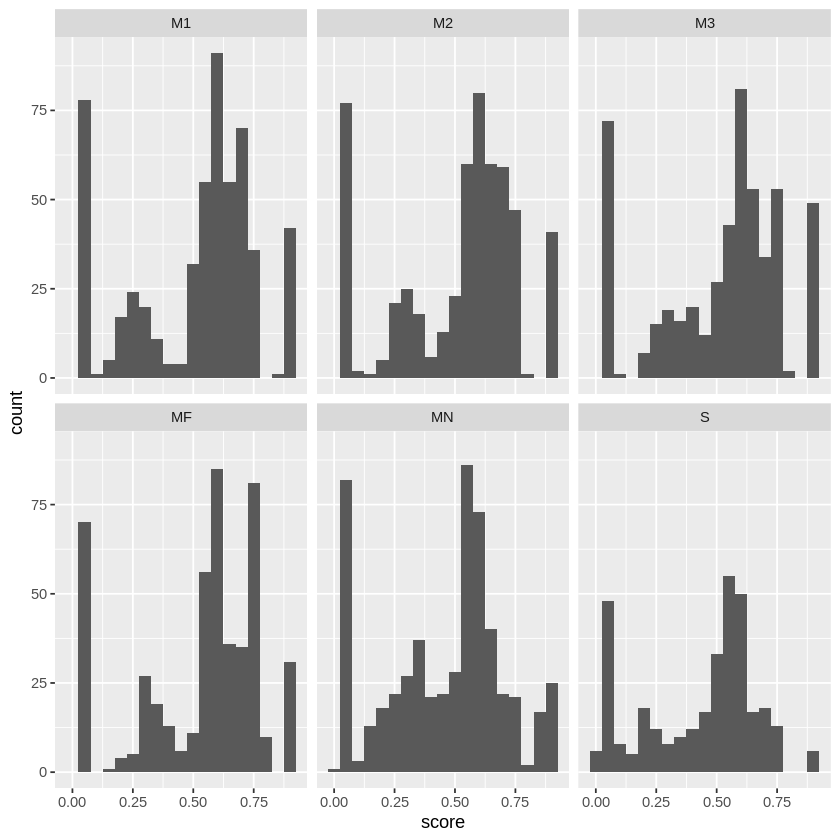

In [21]:
# Analysing the data distribution of models separately

typical <- select(filter(data, (model == 'B1') | (model == 'B2') | (model == 'B3')),c(model, score))
transfer <- select(filter(data, (model != 'B1') & (model != 'B2') & (model != 'B3')),c(model, score))

ggplot(typical, aes(score)) +
  geom_histogram(binwidth = 0.05) +
  facet_wrap(~model)

ggplot(transfer, aes(score)) +
  geom_histogram(binwidth = 0.05) +
  facet_wrap(~model)

### Typical vs Transfer 

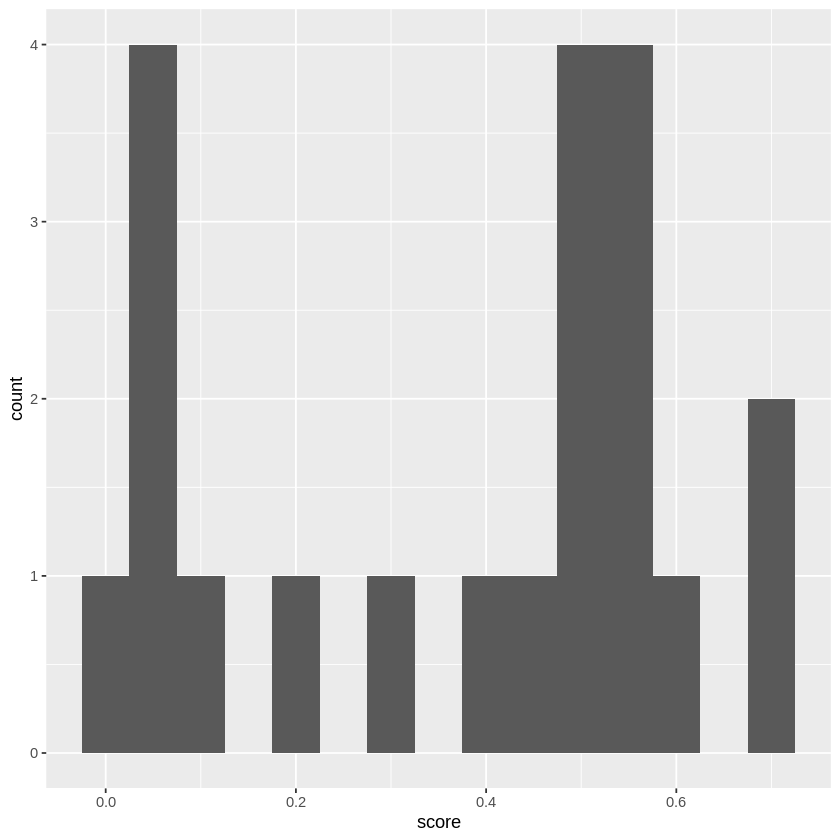

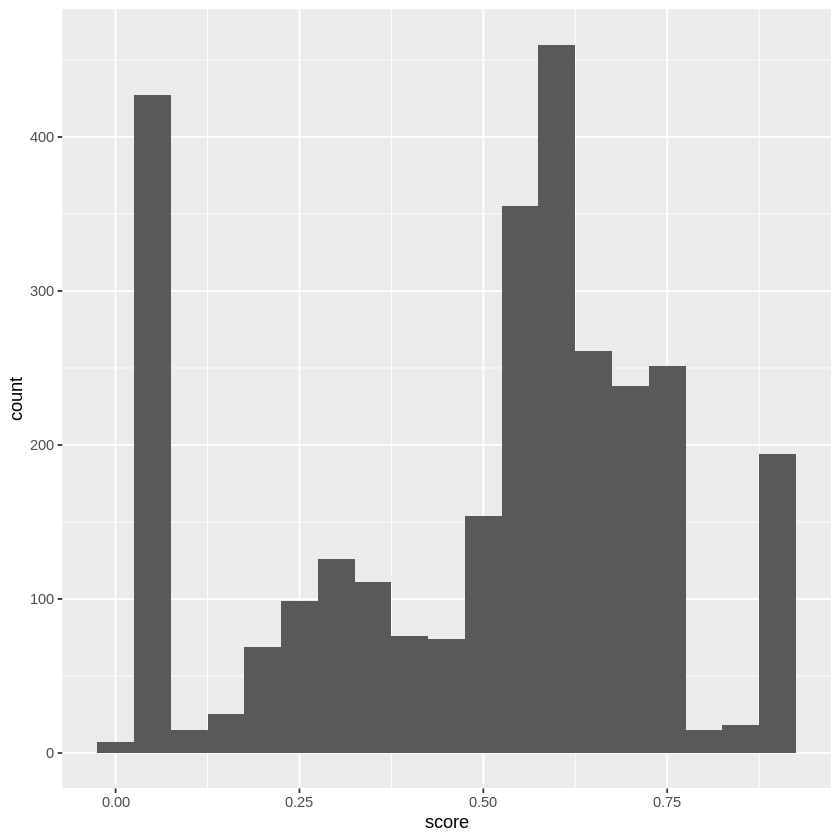

In [23]:
# Analysing the data distribution of Transfer learning vs Typical learning by aggregating the data across models

ggplot(typical, aes(score)) +
  geom_histogram(binwidth = 0.05)

ggplot(transfer, aes(score)) +
  geom_histogram(binwidth = 0.05)

**In order to inspect the data distribution of the different categories of data, the densities of these are plotted. In the first plot, the densities of each model are plotted separately. It is to be noted that the Baseline  models - B1, B2 and B3 have very limited data-points (7 each) as compared to their counterparts and thus the data distribution is in the range of [0,2]. The other transfer learning based models - S, M1, M2, M3, MF and MN all have sufficiently high amount of data points (insert exact numbers) and thus the distributions are in the approximate range of [0,80]. To have a better view of the data distribution across the aggregation of the models across Transfer and Typical learning methods, the densities are marginalized on the model types and thus we obtain the the Transfer learning distribution and Typical learning distribution. A common important observation across all these distributions is that none of these resemble the Gaussian distribution. This means that the statistical tests assuming Normal data distribution can not be used for this study and Non-Parametric tests shall be utilized.**

## Tests 

**To answer the research question of "How much does transfer learning improve over typical non-transfer learning?", the means of the scores obtained by these two type of learning methods are compared. To do so, we use the Wilcoxon Non-parametric test for comparison of means since it does not assume any data distribution. We also choose to compare the means of both these type of learning methods by aggreating the data points across all the models since there is a very limited data given per baseline model for the Typical learning setting which may cause inaccurate or skewed results wehn comparing with their counterparts. Thus the mean score of models B1, B2, B3 is compared agaist the mean score of models M1, M2, M3, MF, MN, S.**

In [33]:
# Performing Wilcoxon Statistical Test for comparison of means 

transfer$type = 'transfer'
typical$type = 'typical'
all <- rbind(transfer, typical)

pander(wilcox.test(score ~ type, all, conf.int = TRUE, conf.level = 0.95))
all %>%
  group_by(type) %>%
  summarize(mean(score))



| Test statistic |    P value    | Alternative hypothesis |
|:--------------:|:-------------:|:----------------------:|
|     41852      | 0.007212  * * |       two.sided        |

Table: Wilcoxon rank sum test with continuity correction: `score` by `type` (continued below)

 

| difference in location |
|:----------------------:|
|        0.09781         |



type,mean(score)
transfer,0.4962816
typical,0.3780441


**The p-value of the Wilcoxon test for comparison of means is < 0.01 (0.007212) thus suggesting that the null hypothesis can be rejected. This means that the mean score of the transfer learning techniques is statistically significantly higher than that of the typical learning techniques by 0.09781 units, with a 95% confidence interval.** 

# RQ2 

## Summary Stats 

**To answer the research question of " What is the effect of the TrD’s on the final model performance?", we compare the mean scores of models when they are trained on each individual training dataset vs when they are not. <br>
For eg: Mean score when TrD_n is used (TrD1 = 0) vs Mean score when TrD_n is used (TrD1 = 0). <br>
We use the Wilcoxon Non-parametric test for comparison of means since it does not assume Gaussian data distribution, as is the case in this scenario**

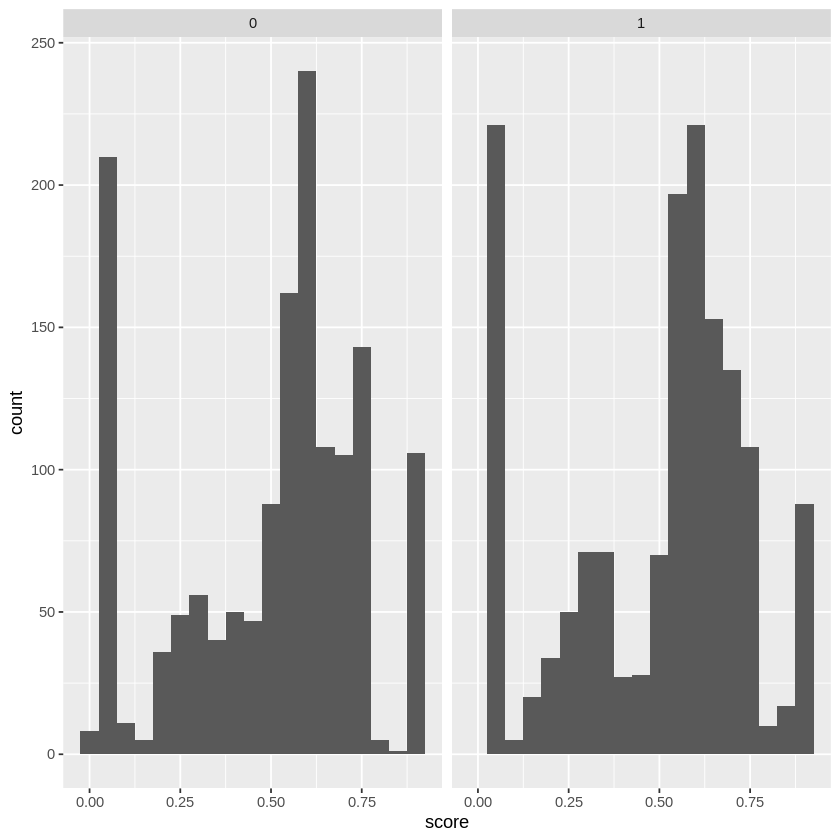

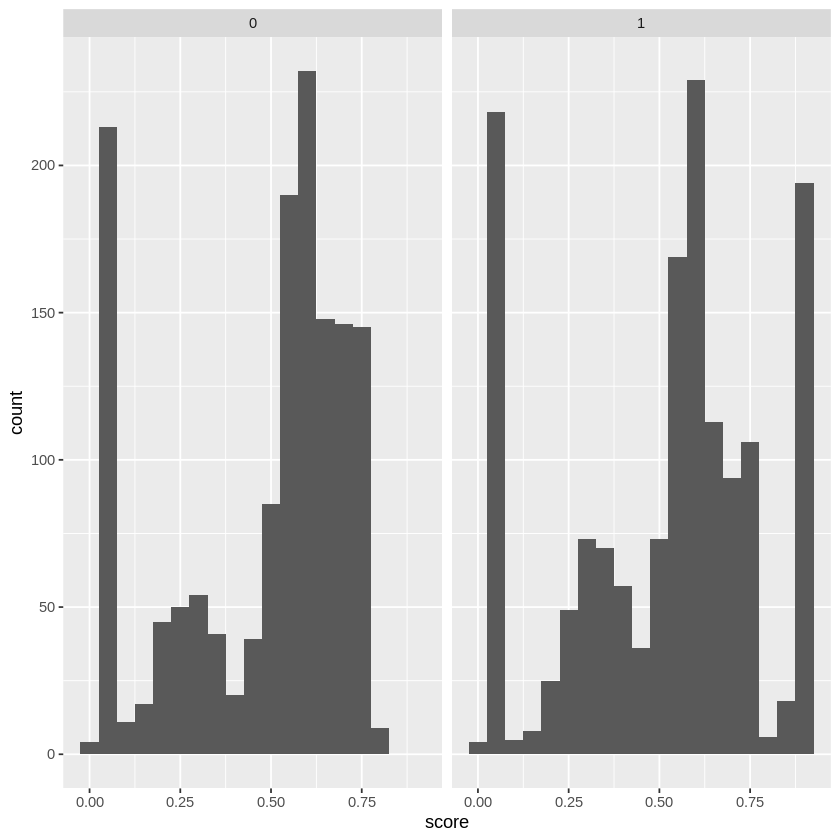

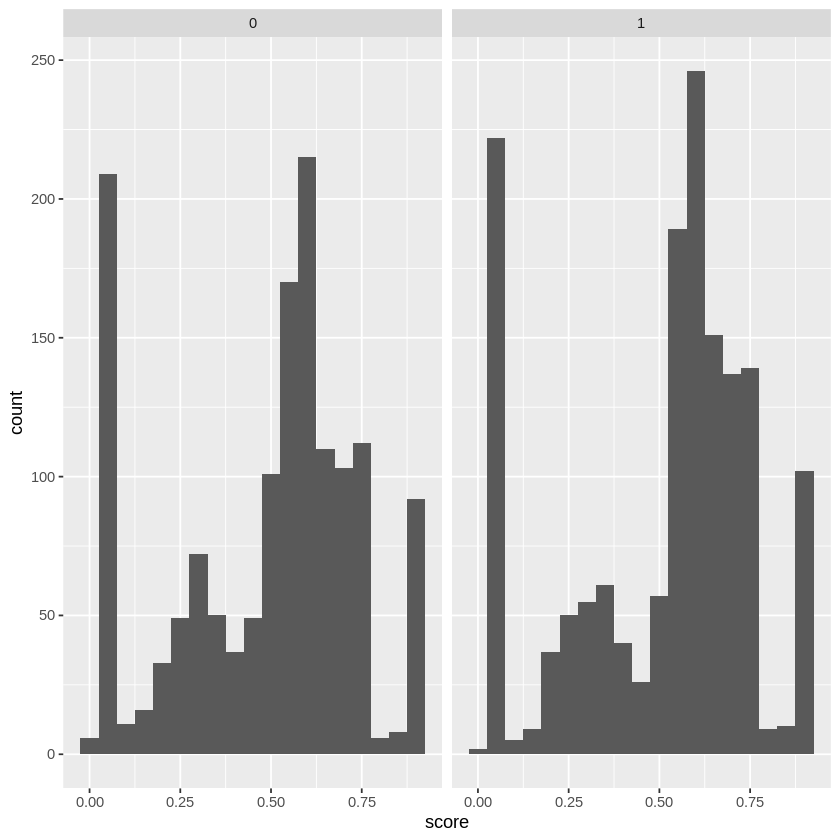

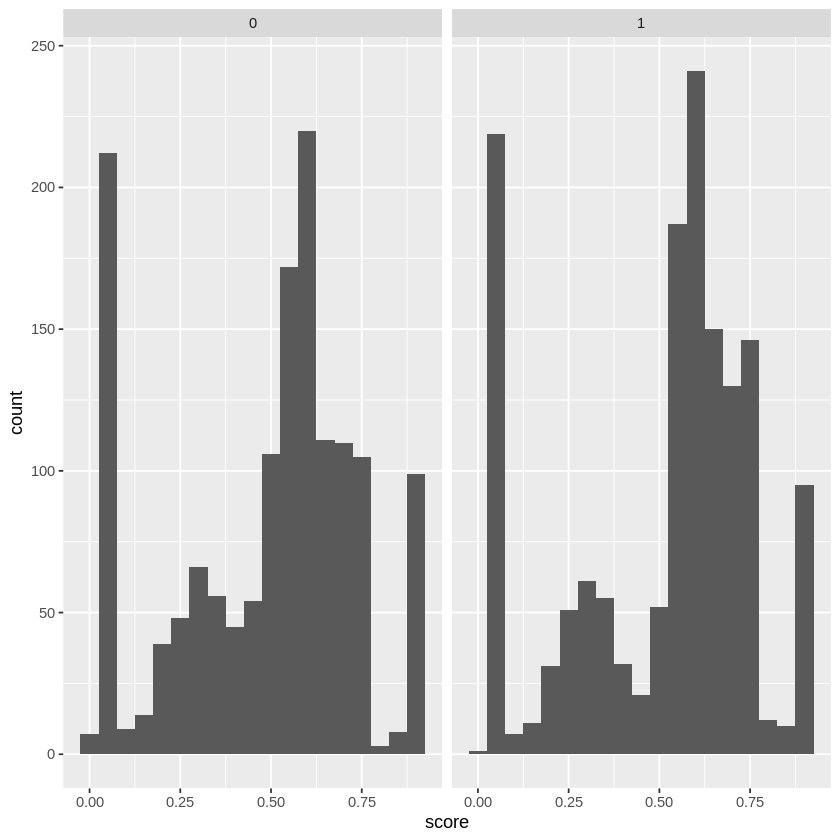

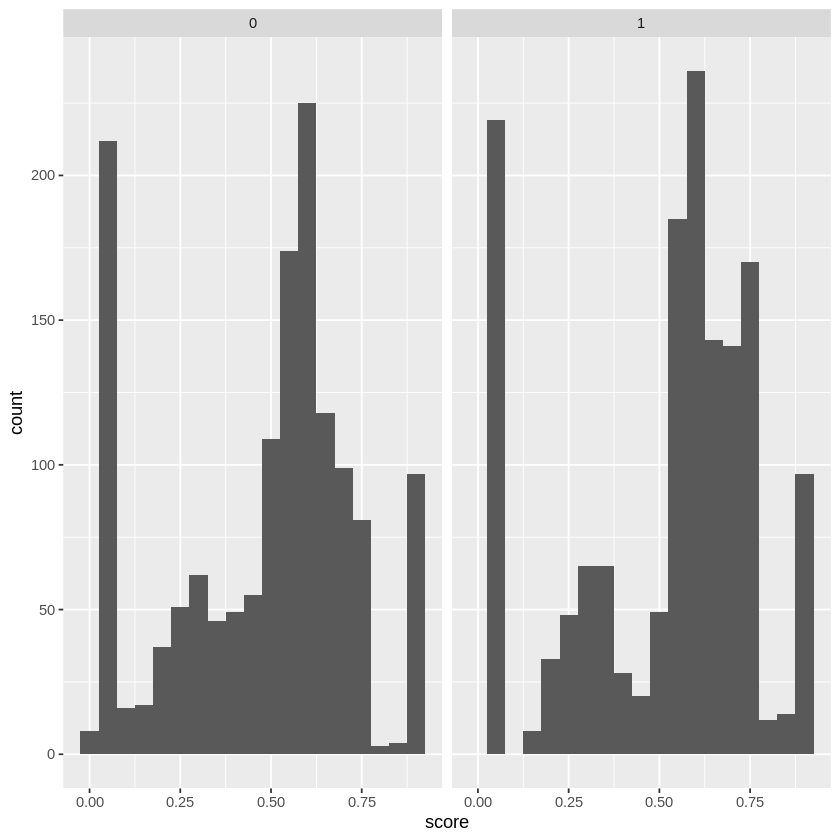

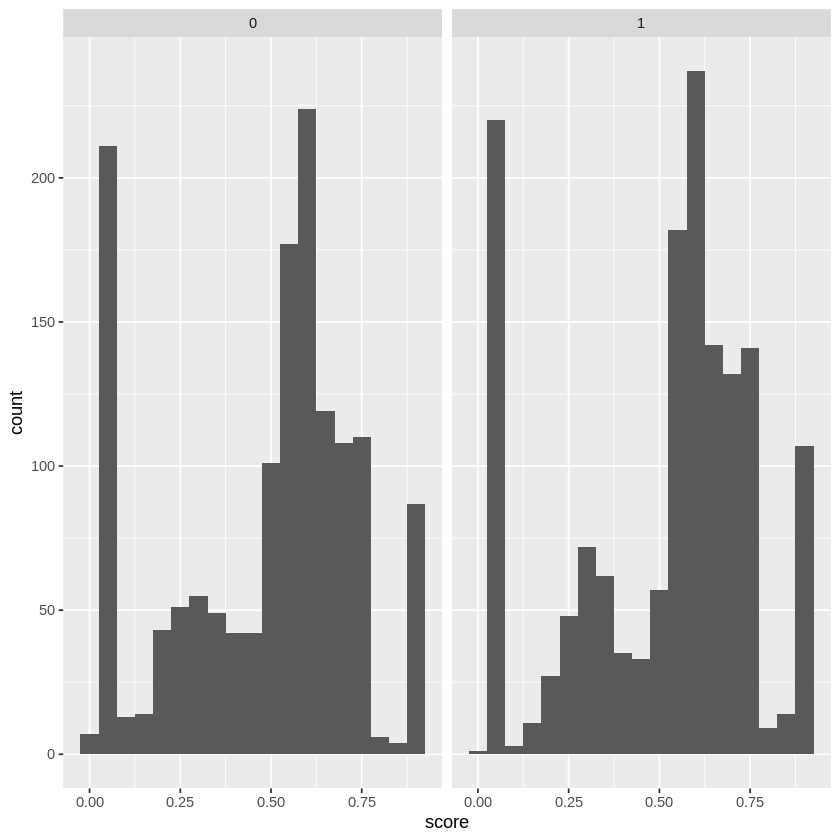

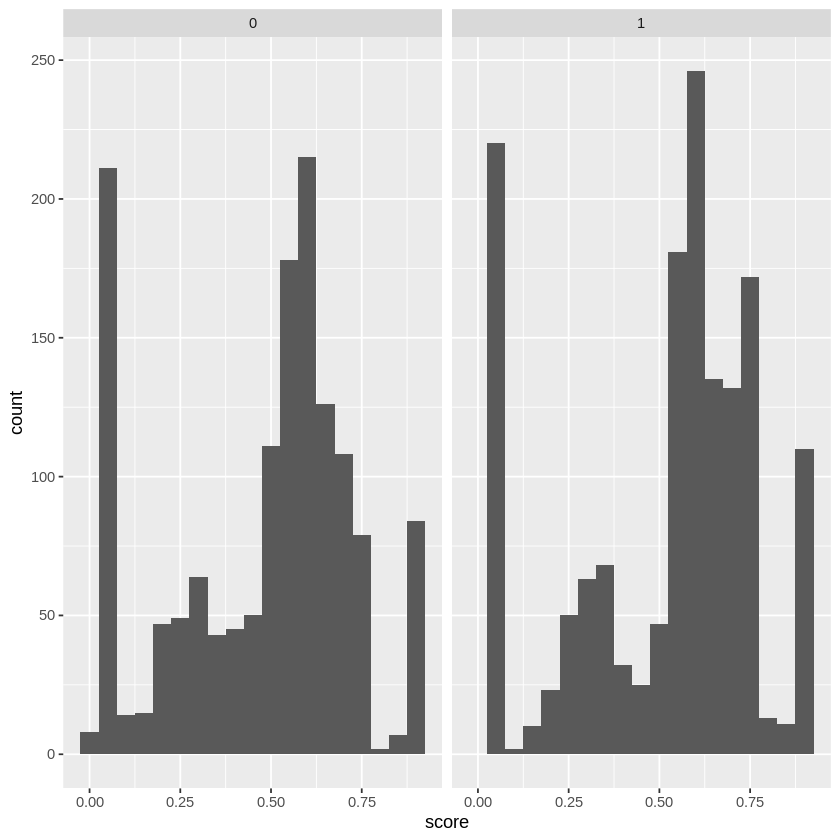

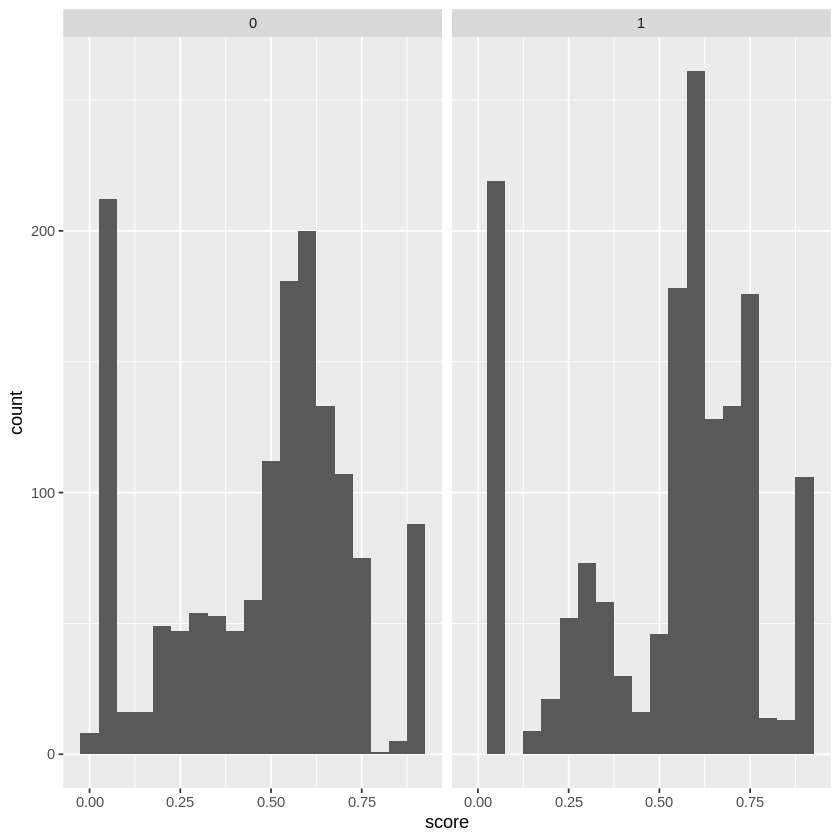

In [36]:
# Plotting data distributions for each TrD

trd1 <- subset(data, select = c("TrD1","score"))
trd2 <- subset(data, select = c("TrD2","score"))
trd3 <- subset(data, select = c("TrD3","score"))
trd4 <- subset(data, select = c("TrD4","score"))
trd5 <- subset(data, select = c("TrD5","score"))
trd6 <- subset(data, select = c("TrD6","score"))
trd7 <- subset(data, select = c("TrD7","score"))
trd8 <- subset(data, select = c("TrD8","score"))

ggplot(trd1, aes(score)) +
  geom_histogram(binwidth = 0.05) +
  facet_wrap(~TrD1)
ggplot(trd2, aes(score)) +
  geom_histogram(binwidth = 0.05) +
  facet_wrap(~TrD2)
ggplot(trd3, aes(score)) +
  geom_histogram(binwidth = 0.05) +
  facet_wrap(~TrD3)
ggplot(trd4, aes(score)) +
  geom_histogram(binwidth = 0.05) +
  facet_wrap(~TrD4)
ggplot(trd5, aes(score)) +
  geom_histogram(binwidth = 0.05) +
  facet_wrap(~TrD5)
ggplot(trd6, aes(score)) +
  geom_histogram(binwidth = 0.05) +
  facet_wrap(~TrD6)
ggplot(trd7, aes(score)) +
  geom_histogram(binwidth = 0.05) +
  facet_wrap(~TrD7)
ggplot(trd8, aes(score)) +
  geom_histogram(binwidth = 0.05) +
  facet_wrap(~TrD8)

## Tests 

In [40]:
# Carrying out statistical tests

pander(wilcox.test(score ~ TrD1, trd1, conf.int = TRUE))
trd1 %>%
  group_by(TrD1) %>%
  summarize(mean(score))

pander(wilcox.test(score ~ TrD2, trd2, conf.int = TRUE))
trd2 %>%
  group_by(TrD2) %>%
  summarize(mean(score))

pander(wilcox.test(score ~ TrD3, trd3, conf.int = TRUE))
trd3 %>%
  group_by(TrD3) %>%
  summarize(mean(score))

pander(wilcox.test(score ~ TrD4, trd4, conf.int = TRUE))
trd4 %>%
  group_by(TrD4) %>%
  summarize(mean(score))

pander(wilcox.test(score ~ TrD5, trd5, conf.int = TRUE))
trd5 %>%
  group_by(TrD5) %>%
  summarize(mean(score))

pander(wilcox.test(score ~ TrD6, trd6, conf.int = TRUE))
trd6 %>%
  group_by(TrD6) %>%
  summarize(mean(score))

pander(wilcox.test(score ~ TrD7, trd7, conf.int = TRUE))
trd7 %>%
  group_by(TrD7) %>%
  summarize(mean(score))

pander(wilcox.test(score ~ TrD8, trd8, conf.int = TRUE))
trd8 %>%
  group_by(TrD8) %>%
  summarize(mean(score))



| Test statistic | P value | Alternative hypothesis | difference in location |
|:--------------:|:-------:|:----------------------:|:----------------------:|
|    1123447     | 0.9382  |       two.sided        |       0.0003157        |

Table: Wilcoxon rank sum test with continuity correction: `score` by `TrD1`



TrD1,mean(score)
0,0.4966636
1,0.4942866




| Test statistic |    P value    | Alternative hypothesis |
|:--------------:|:-------------:|:----------------------:|
|    1045136     | 0.001384  * * |       two.sided        |

Table: Wilcoxon rank sum test with continuity correction: `score` by `TrD2` (continued below)

 

| difference in location |
|:----------------------:|
|        -0.01869        |



TrD2,mean(score)
0,0.4771900
1,0.5125588




| Test statistic |     P value      | Alternative hypothesis |
|:--------------:|:----------------:|:----------------------:|
|    1036488     | 0.0003661  * * * |       two.sided        |

Table: Wilcoxon rank sum test with continuity correction: `score` by `TrD3` (continued below)

 

| difference in location |
|:----------------------:|
|        -0.01742        |



TrD3,mean(score)
0,0.4838675
1,0.5063043




| Test statistic |     P value      | Alternative hypothesis |
|:--------------:|:----------------:|:----------------------:|
|    1032618     | 0.0001621  * * * |       two.sided        |

Table: Wilcoxon rank sum test with continuity correction: `score` by `TrD4` (continued below)

 

| difference in location |
|:----------------------:|
|        -0.01807        |



TrD4,mean(score)
0,0.4845376
1,0.5061660




| Test statistic |     P value      | Alternative hypothesis |
|:--------------:|:----------------:|:----------------------:|
|     977498     | 1.203e-09  * * * |       two.sided        |

Table: Wilcoxon rank sum test with continuity correction: `score` by `TrD5` (continued below)

 

| difference in location |
|:----------------------:|
|        -0.03281        |



TrD5,mean(score)
0,0.4760554
1,0.5139646




| Test statistic |     P value      | Alternative hypothesis |
|:--------------:|:----------------:|:----------------------:|
|    1034048     | 0.0002239  * * * |       two.sided        |

Table: Wilcoxon rank sum test with continuity correction: `score` by `TrD6` (continued below)

 

| difference in location |
|:----------------------:|
|        -0.01849        |



TrD6,mean(score)
0,0.4826424
1,0.5076784




| Test statistic |     P value      | Alternative hypothesis |
|:--------------:|:----------------:|:----------------------:|
|     978334     | 1.602e-09  * * * |       two.sided        |

Table: Wilcoxon rank sum test with continuity correction: `score` by `TrD7` (continued below)

 

| difference in location |
|:----------------------:|
|        -0.03415        |



TrD7,mean(score)
0,0.4747570
1,0.5150199




| Test statistic |     P value      | Alternative hypothesis |
|:--------------:|:----------------:|:----------------------:|
|     955432     | 2.347e-12  * * * |       two.sided        |

Table: Wilcoxon rank sum test with continuity correction: `score` by `TrD8` (continued below)

 

| difference in location |
|:----------------------:|
|        -0.03918        |



TrD8,mean(score)
0,0.4724696
1,0.5173867


**The p-value for the difference in means is > 0.5 (0.932) for only TrD1 and is < 0.01 for the rest of the training datasets. This implies that the training datasets 2-8 had a statistically significant impact on the final model score and that the data for Training dataset 1 is not sufficient enough to rule out the null hypothesis stating 0 difference in means. Furthermore, the negative difference in means with 95% confidence interval for TrD2 - TrD8 suggests that the mean score when the training data is used is greater than when it's not, indicating a positive impact and improvement in the scores** 